<h1><center>MODELO PREDICTIVO PARA LA DETECCIÓN DE FRAUDES EN TARJETAS DE CRÉDITO APLICANDO APRENDIZAJE AUTOMÁTICO</center></h1>

## Autores : Daniel Enrique Barros Agamez & Kevin Acosta Lopez


## 1. Cargando Datos

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy.stats import ttest_ind


COLUMNAS = np.array(['Id','Fecha de Transaccion','No tarjeta cliente','Nombre comerciante','Categoria comerciante','Monto transaccion', 'Nombre',
           'Apellido','Genero','Direccion tarjeta','Ciudad','Estado','Zip tarjeta','Latitud','Longitud','Ciudad popular',
           'Trabajo','Fecha de nacimiento','Fecha unica','Hora transaccion','Latitud comerciante','Longitud comerciante', 'Fraude'])
data = pd.read_csv("fraude.csv", delimiter = ',' , names = COLUMNAS , header = 0)
del(COLUMNAS)
data.head(5)

,Id,Fecha de Transaccion,No tarjeta cliente,Nombre comerciante,Categoria comerciante,Monto transaccion,Nombre,Apellido,Genero,Direccion tarjeta,...,Latitud,Longitud,Ciudad popular,Trabajo,Fecha de nacimiento,Fecha unica,Hora transaccion,Latitud comerciante,Longitud comerciante,Fraude
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## 2. Exploración de los datos

### *2.1 y 2.2 Número de instancias y atributos:*

In [2]:
shape = data.shape
print(f"Número de instancias: {shape[0]}")
print(f"Número de atributos: {shape[1]}")

Número de instancias: 563225
Número de atributos: 23


### *2.3 El conjunto de datos está etiquetado con la variable de clase "is_fraud"*

### *2.4 Cantidad de atributos númerico y categoricos*

In [4]:
data.dtypes

Id                         int64
Fecha de Transaccion      object
No tarjeta cliente         int64
Nombre comerciante        object
Categoria comerciante     object
Monto transaccion        float64
Nombre                    object
Apellido                  object
Genero                    object
Direccion tarjeta         object
Ciudad                    object
Estado                    object
Zip tarjeta                int64
Latitud                  float64
Longitud                 float64
Ciudad popular             int64
Trabajo                   object
Fecha de nacimiento       object
Fecha unica               object
Hora transaccion           int64
Latitud comerciante      float64
Longitud comerciante     float64
Fraude                     int64
dtype: object

In [5]:
data['Fraude'] = data['Fraude'].astype('object')
categorico = data.select_dtypes(include = 'object').columns
numerico = data.select_dtypes(include = 'int64').columns
flotante = data.select_dtypes(include = 'float64').columns


print("Variables categoricas: ", len(categorico))
print("Variables númericas: ", len(numerico))
print("Variables numericas flotantes: ", len(flotante))

Variables categoricas:  13
Variables númericas:  5
Variables numericas flotantes:  5


### *2.5 Moda, cantidad de valores únicos y frecuencia de atributos categoricos*

In [40]:
#Eliminación de atributos que no son relevantes
data = data.drop(columns=['Id', 'Fecha unica', 'Nombre', 'Apellido', 'Nombre comerciante'])

In [41]:
data.select_dtypes(include='object').describe()

,Fecha de Transaccion,Categoria comerciante,Genero,Direccion tarjeta,Ciudad,Estado,Trabajo,Fecha de nacimiento
count,563225,563225,563225,563225,563225,563225,563225,563225
unique,552261,14,2,999,906,51,497,984
top,2020-12-19 16:02:22,gas_transport,F,6983 Carrillo Isle,Birmingham,TX,Film/video editor,1977-03-23
freq,4,56988,308621,1476,2434,40872,4163,2424


### *2.6 Media, rango y desviación estandar de cada atributo numérico*

In [7]:
data.describe()

,No tarjeta cliente,Monto transaccion,Zip tarjeta,Latitud,Longitud,Ciudad popular,Hora transaccion,Latitud comerciante,Longitud comerciante
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575
25%,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129
50%,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204
75%,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637
max,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026


In [8]:
#rango
data.select_dtypes(exclude='object').apply(lambda x: max(x)-min(x))

No tarjeta cliente      4.992346e+18
Monto transaccion       2.276711e+04
Zip tarjeta             9.866400e+04
Latitud                 4.566280e+01
Longitud                9.772200e+01
Ciudad popular          2.906677e+06
Hora transaccion        1.671751e+07
Latitud comerciante     4.765187e+01
Longitud comerciante    9.971955e+01
dtype: float64

### *2.7 Distribción de las clases*

In [29]:
def countplot(data, x, xlabel, ylabel, titulo, tema):
    ax = sb.countplot(x = x, data = data, palette=tema)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(titulo, fontsize=14)
    return ax

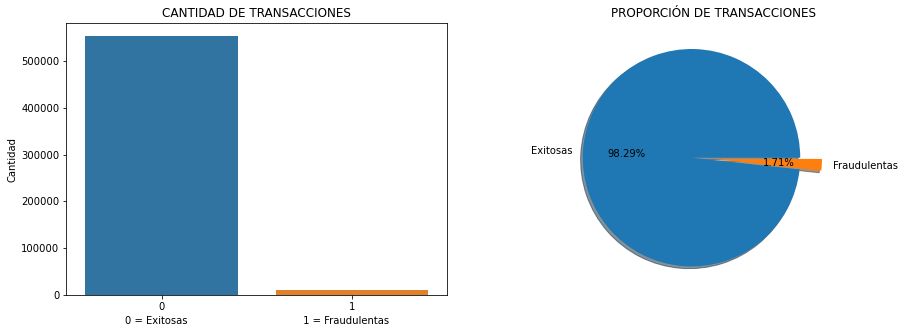

In [82]:
datos = data['Fraude'].value_counts()
labels = np.array(['Exitosas', 'Fraudulentas'])
#figura y gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
circular = ax2.pie(datos.values, labels=labels, autopct='%1.2f%%', shadow=True, explode = [0.2, 0])
#barras = ax1.bar(labels, datos.values)
barras = sb.countplot(x = 'Fraude', data = data, ax = ax1)
#Titulos
ax2.set(title="PROPORCIÓN DE TRANSACCIONES")
ax1.set(title="CANTIDAD DE TRANSACCIONES")
ax1.set(ylabel = 'Cantidad')
ax1.set(xlabel = f'0 = Exitosas {" "*35} 1 = Fraudulentas')
plt.show()

In [58]:
print("Cantidad de fruades : ", datos[1])
print("Cantidad casos exitosos : ", datos[0])
print("Difenrencia entre las clases: ", datos[0]-datos[1])

Cantidad de fruades :  9651
Cantidad casos exitosos :  553574
Difenrencia entre las clases:  543923


Media Duration :  75.54883345022084


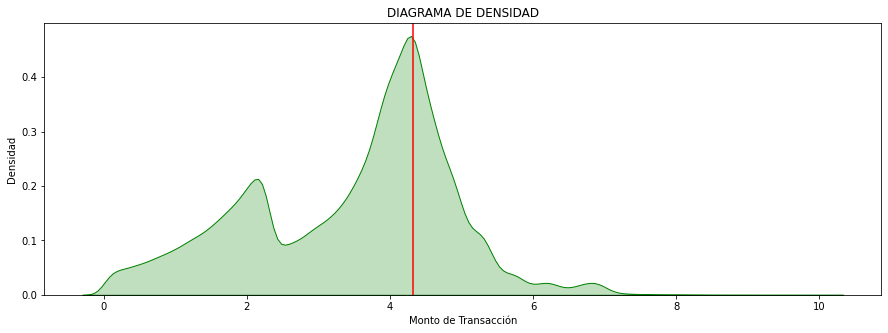

In [5]:
plt.figure(figsize=(15, 5))
media1 = data['Monto transaccion'].mean()
sb.kdeplot(x = np.log(data['Monto transaccion'].values), shade = True, color = 'green')
plt.ylabel("Densidad")
plt.xlabel("Monto de Transacción")
plt.title("DIAGRAMA DE DENSIDAD")
plt.axvline(np.log(media1), 0,1, color = 'red')
print(f"Media Duration :  {media1}")


Text(0.5, 1.0, 'DIAGRAMA DE DENSIDAD')

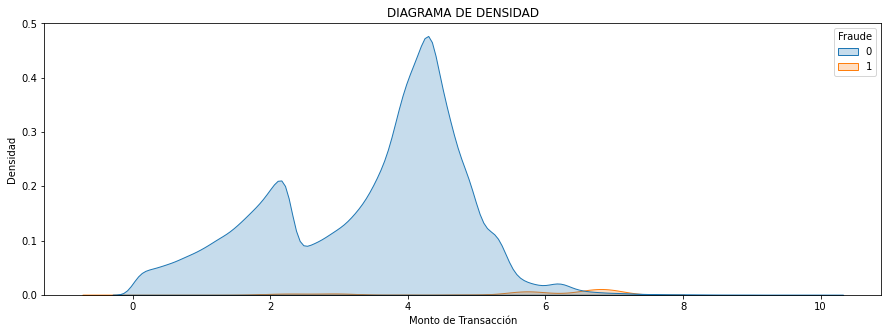

In [7]:
#Cambiar colores
plt.figure(figsize=(15, 5))
sb.kdeplot(x = np.log(data['Monto transaccion'].values), shade = True, hue = data['Fraude'], palette = "tab10")
plt.ylabel("Densidad")
plt.xlabel("Monto de Transacción")
plt.title("DIAGRAMA DE DENSIDAD")

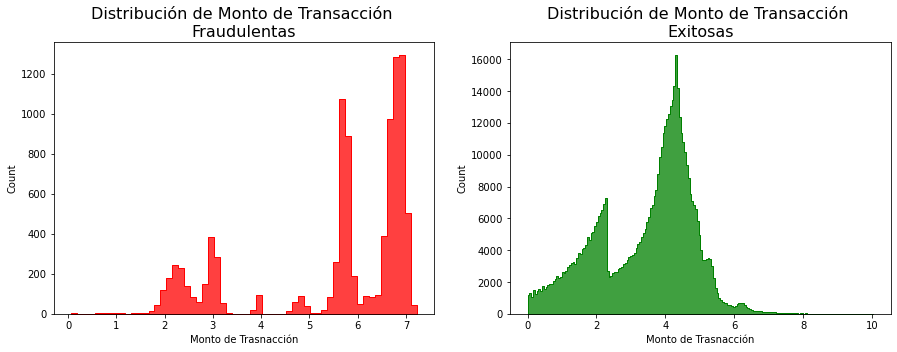

In [10]:
monto_Fra = data['Monto transaccion'].loc[data['Fraude'] == 1].values #Fraudulentas
monto_Exi = data['Monto transaccion'].loc[data['Fraude'] == 0].values #Exitosas
#Figuras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1 = sb.histplot(np.log(monto_Fra), ax = ax1, element = "step", color = 'red')
ax2 = sb.histplot(np.log(monto_Exi), ax = ax2, element="step", color = 'green')
#Etiquetas
ax1.set_xlabel('Monto de Trasnacción')
ax1.set_title('Distribución de Monto de Transacción \nFraudulentas', fontsize=16)
ax2.set_xlabel('Monto de Trasnacción')
ax2.set_title('Distribución de Monto de Transacción \nExitosas', fontsize=16)
plt.show()

## 3. Relacionando Atributos

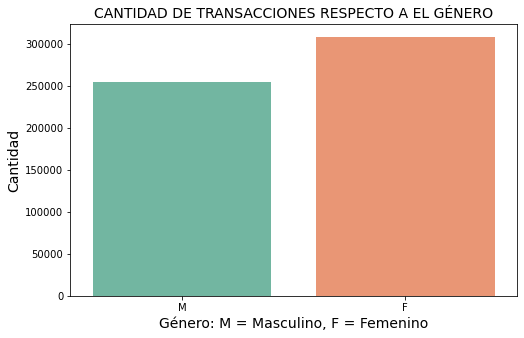

In [19]:
#Relación cantidad de transacciones y género
plt.figure(figsize=(8,5))
ax = sb.countplot(x = data['Genero'], data = data, palette="Set2")
ax.set_xlabel("Género: M = Masculino, F = Femenino", fontsize=14)
ax.set_ylabel("Cantidad", fontsize=14)
ax.set_title("CANTIDAD DE TRANSACCIONES RESPECTO A EL GÉNERO", fontsize = 14)
plt.show()

In [26]:
data.groupby('Genero')['Genero'].count().sort_values(ascending = False)

Genero
F    304886
M    250833
Name: Genero, dtype: int64

In [27]:
#Relación cantidad de transacciones exitosas y fraudulentas con respecto al género
genero_Fra = data[data.Fraude == 1] # fraudulentas
genero_Exi = data[data.Fraude == 0] # exitosas

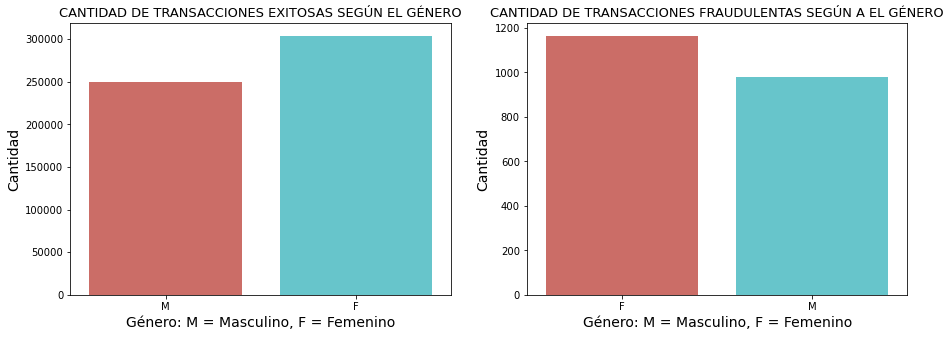

In [28]:
#Figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
#Gráfica
ax1 = sb.countplot(x = 'Genero', data = genero_Exi, ax = ax1, palette = 'hls')
ax2 = sb.countplot(x = 'Genero', data = genero_Fra, ax = ax2, palette = 'hls')
#Etiquetas
ax1.set_xlabel("Género: M = Masculino, F = Femenino", fontsize=14)
ax1.set_ylabel("Cantidad", fontsize=14)
ax1.set_title("CANTIDAD DE TRANSACCIONES EXITOSAS SEGÚN EL GÉNERO", fontsize=13)
ax2.set_xlabel("Género: M = Masculino, F = Femenino", fontsize=14)
ax2.set_ylabel("Cantidad", fontsize=14)
ax2.set_title("CANTIDAD DE TRANSACCIONES FRAUDULENTAS SEGÚN A EL GÉNERO", fontsize=13)
plt.show()

In [29]:
#data['Fecha de Transaccion'] = pd.to_datetime(data['Fecha de Transaccion'])
#ax = sb.lineplot(x='Fecha de Transaccion', data = data)
estados = data.groupby('Estado')['Estado'].count().sort_values(ascending = False).head(10)

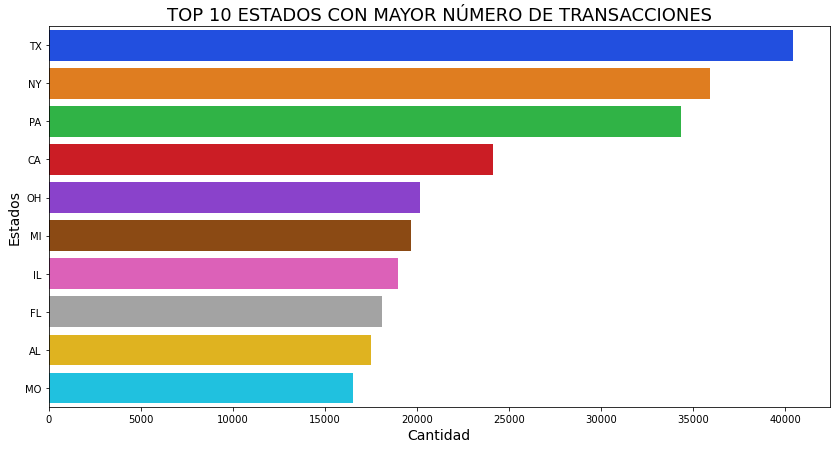

Estado
TX    40393
NY    35918
PA    34326
CA    24135
OH    20147
MI    19671
IL    18960
FL    18104
AL    17532
MO    16501
Name: Estado, dtype: int64


In [30]:
#Relación cantidad de transacciones y Estado
plt.figure(figsize=(14,7))
ax = sb.barplot(x = estados.values, y = estados.index, palette="bright")
ax.set_ylabel("Estados", fontsize=14)
ax.set_xlabel("Cantidad", fontsize=14)
ax.set_title("TOP 10 ESTADOS CON MAYOR NÚMERO DE TRANSACCIONES", fontsize=18)
plt.show()
print(estados)

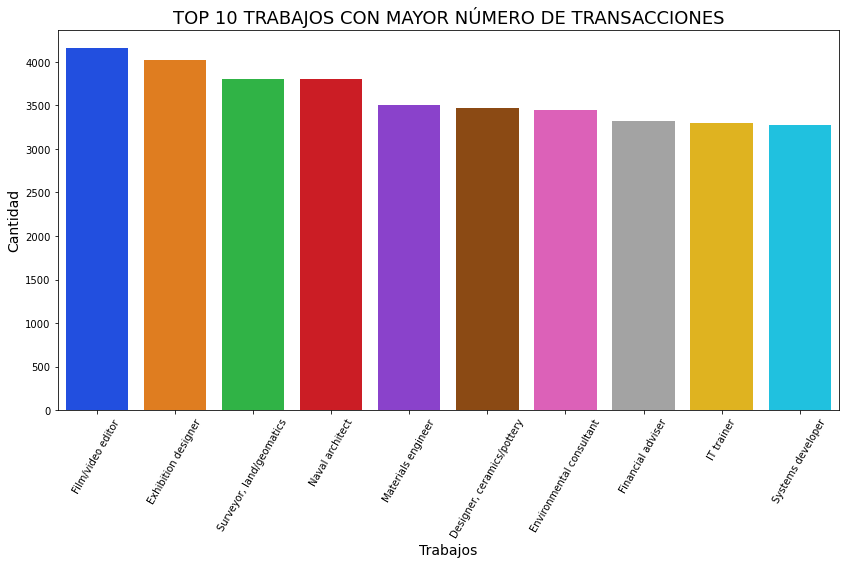

Trabajo
Film/video editor             4163
Exhibition designer           4019
Surveyor, land/geomatics      3806
Naval architect               3803
Materials engineer            3503
Designer, ceramics/pottery    3475
Environmental consultant      3449
Financial adviser             3327
IT trainer                    3293
Systems developer             3275
Name: Trabajo, dtype: int64


In [16]:
#Relación cantidad de transacciones y trabajos
trabajos = data.groupby('Trabajo')['Trabajo'].count().sort_values(ascending = False).head(10)
plt.figure(figsize=(14,7))
ax = sb.barplot(y = trabajos.values, x = trabajos.index, palette="bright")
ax.set_ylabel("Cantidad", fontsize=14)
ax.set_xlabel("Trabajos", fontsize=14)
ax.set_xticklabels(trabajos.index, rotation = 60) 
ax.set_title("TOP 10 TRABAJOS CON MAYOR NÚMERO DE TRANSACCIONES", fontsize=18)
plt.show()
print(trabajos)

### 3. MATRIZ DE CORRELACIÓN

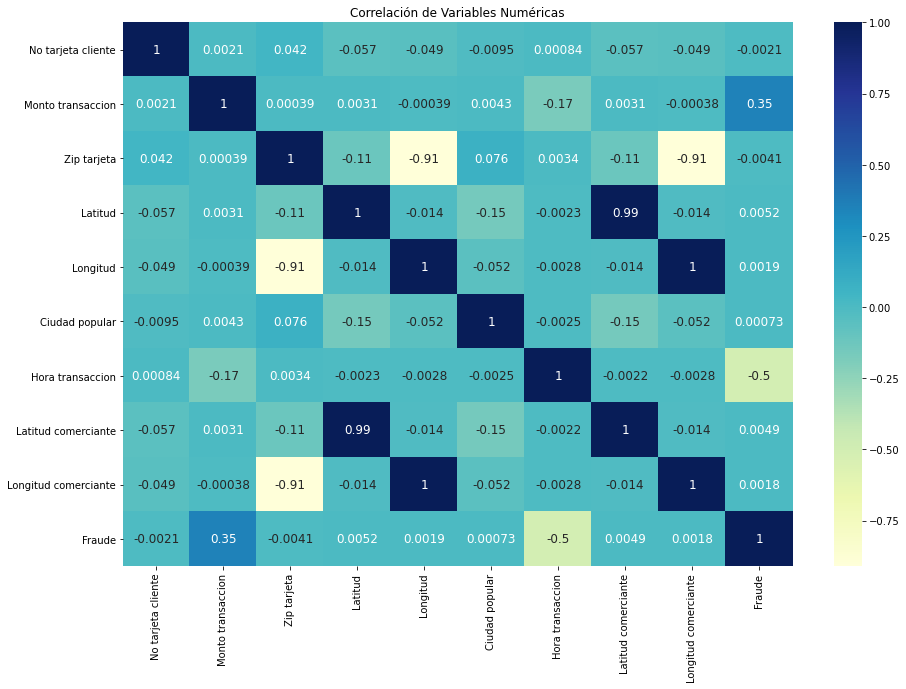

In [26]:
data['Fraude'] = data['Fraude'].astype('int64')
plt.figure(figsize=(15,10))
pc = data.corr(method ='pearson')
ax = sb.heatmap(pc, annot=True, annot_kws={'size': 12}, cmap="YlGnBu")
plt.title('Correlación de Variables Numéricas')
plt.show()

## *Balance de la población a través de una submuestra*

In [44]:
#Obtener muestra aleatoria de los datos
data2 = data.sample(frac = 1)

#Recordemos que la cantidad de datos fraudulentos es 2145
data_Fra = data.loc[data2['Fraude'] == 1]
data_Exi = data.loc[data2['Fraude'] == 0][:9651]

#Uniendo los datos
new_Data = pd.concat([data_Fra, data_Exi]).sample(frac = 1, random_state = 1)
new_Data.head()

,Fecha de Transaccion,No tarjeta cliente,Categoria comerciante,Monto transaccion,Genero,Direccion tarjeta,Ciudad,Estado,Zip tarjeta,Latitud,Longitud,Ciudad popular,Trabajo,Fecha de nacimiento,Hora transaccion,Latitud comerciante,Longitud comerciante,Fraude
1307,2020-06-21 19:39:26,30248898834493,home,119.96,M,172 Paula Inlet Apt. 650,Cross Plains,TX,76443,32.1482,-99.1872,1897,Chief Operating Officer,1953-04-19,1371843566,32.549387,-98.987238,0
3842,2020-06-22 13:12:34,577588686219,misc_pos,382.54,M,25454 Leonard Lake,Spring Church,PA,15686,40.6153,-79.4545,972,Public relations account executive,1997-10-23,1371906754,40.035345,-78.739971,0
556372,2019-02-08 22:58:22,180049032966888,grocery_pos,297.76,M,70761 Fitzpatrick Brooks Suite 631,Saxon,WI,54559,46.4959,-90.4383,795,Television/film/video producer,1986-04-15,1328741902,45.980951,-90.723171,1
190819,2020-08-27 02:52:46,6011975266774121,gas_transport,8.91,F,05561 Farrell Crescent,Annapolis,MD,21405,39.0305,-76.5515,92106,"Accountant, chartered certified",1943-05-28,1377571966,38.816774,-77.148697,1
562149,2020-04-09 22:22:01,4045036286570100739,misc_net,825.99,F,9588 Cox Rapid Apt. 257,Atglen,PA,19310,39.9458,-75.9703,3066,Product manager,1928-07-15,1365546121,40.588898,-75.006591,1


In [45]:
new_Data['Fraude'] = new_Data['Fraude'].astype('int64')
new_Data['Genero'] = new_Data['Genero'].astype('category').cat.codes
new_Data['Categoria comerciante'] = new_Data['Categoria comerciante'].astype('category').cat.codes
new_Data['Trabajo'] = new_Data['Trabajo'].astype('category').cat.codes

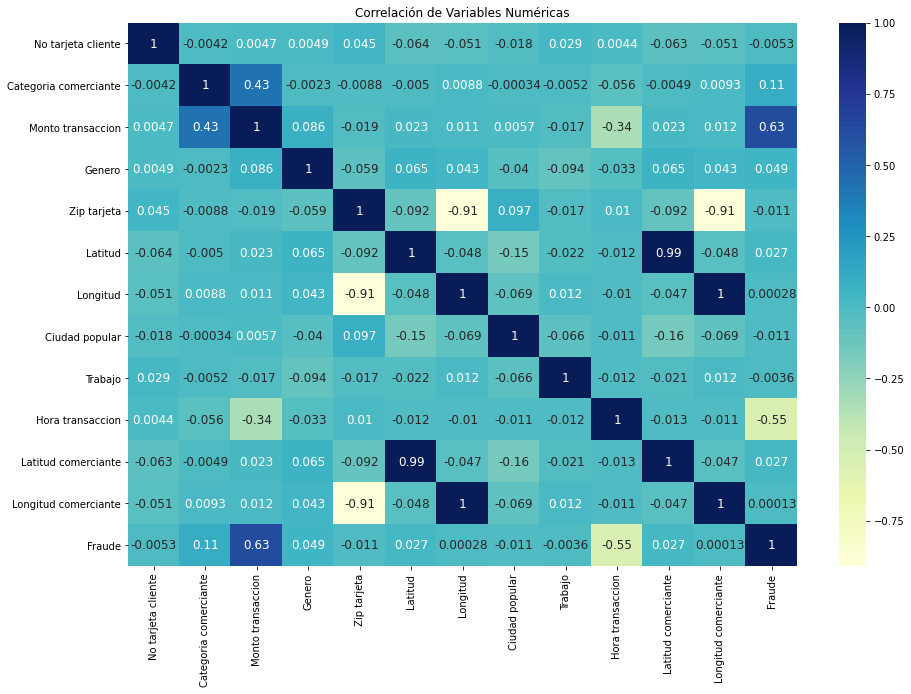

In [46]:
plt.figure(figsize=(15,10))
pc = new_Data.corr(method ='pearson')
ax = sb.heatmap(pc, annot=True, annot_kws={'size': 12}, cmap="YlGnBu")
plt.title('Correlación de Variables Numéricas')
plt.show()

### *2.8 Detección de datos atipicos*

In [19]:
data.isna().sum()

Fecha de Transaccion     0
No tarjeta cliente       0
Nombre comerciante       0
Categoria comerciante    0
Monto transaccion        0
Nombre                   0
Apellido                 0
Genero                   0
Direccion tarjeta        0
Ciudad                   0
Estado                   0
Zip tarjeta              0
Latitud                  0
Longitud                 0
Ciudad popular           0
Trabajo                  0
Fecha de nacimiento      0
Hora transaccion         0
Latitud comerciante      0
Longitud comerciante     0
Fraude                   0
dtype: int64

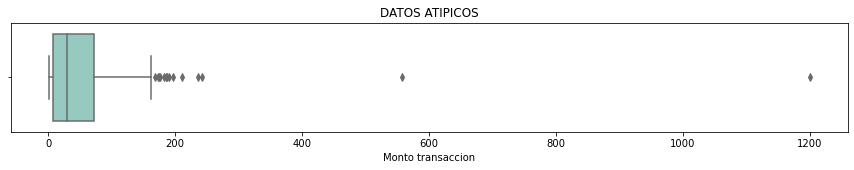

count    555719.000000
mean         69.392810
std         156.745941
min           1.000000
25%           9.630000
50%          47.290000
75%          83.010000
max       22768.110000
Name: Monto transaccion, dtype: float64
IQR:  73.38000000000001


In [41]:
plt.figure(figsize=(15, 2))
plt.title("DATOS ATIPICOS")
ax = sb.boxplot(x = data['Monto transaccion'].head(300), orient="h", palette="Set3")
plt.show()
print(data['Monto transaccion'].describe())
print("IQR: ", data['Monto transaccion'].quantile(0.75)-data['Monto transaccion'].quantile(0.25))

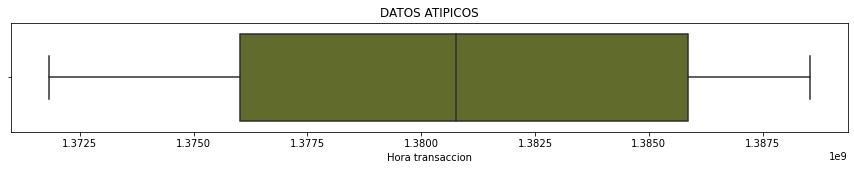

count    5.557190e+05
mean     1.380679e+09
std      5.201104e+06
min      1.371817e+09
25%      1.376029e+09
50%      1.380762e+09
75%      1.385867e+09
max      1.388534e+09
Name: Hora transaccion, dtype: float64
IQR:  9838356.5


In [40]:
plt.figure(figsize=(15, 2))
plt.title("DATOS ATIPICOS")
ax = sb.boxplot(x = data['Hora transaccion'], orient="h", color = '#687522')
plt.show()
print(data['Hora transaccion'].describe())
print("IQR: ", data['Hora transaccion'].quantile(0.75)-data['Hora transaccion'].quantile(0.25))

<Figure size 1008x504 with 0 Axes>

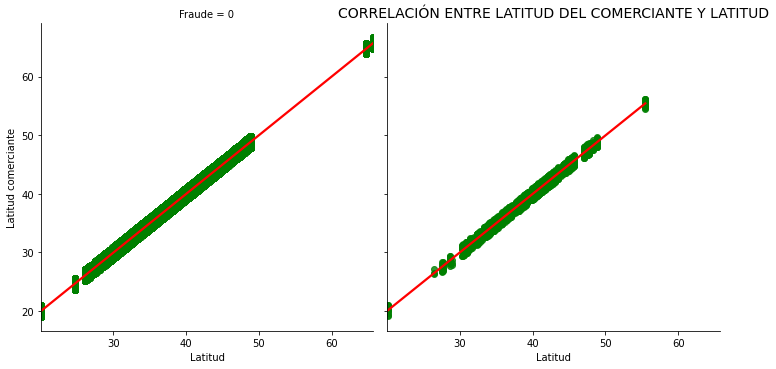

In [38]:
plt.figure(figsize=(14,7))
ax = sb.lmplot(y = 'Latitud comerciante', x = 'Latitud', data = data, col = 'Fraude', line_kws= {'color':'red'},                        scatter_kws={'color':'g'})
plt.title('CORRELACIÓN ENTRE LATITUD DEL COMERCIANTE Y LATITUD', fontsize = 14)
plt.show()

## 4. Hipótesis


In [52]:
def prueba(p):
    if (p < 0.05):
        return ("Si existen diferencias significativas")
    return("No se econtrarón diferencias significativas")

### Primera Hipótesis
- Hipotesis Alternativa: si existen diferencias significativas en el monto de la transaccion de los hombres y de las mujeres
- Hipotesis Nula : No, son iguales
- Alpha: 5% = 0.5


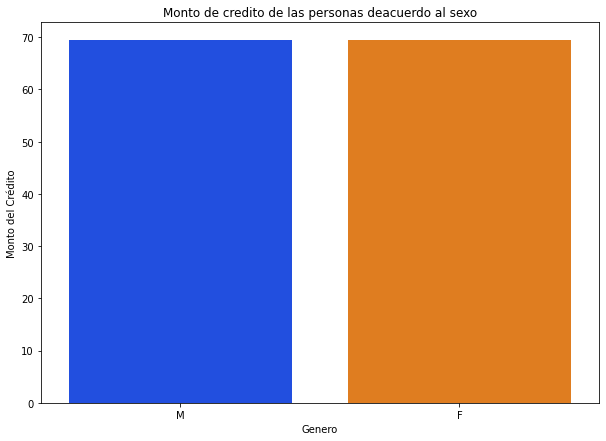

In [35]:
plt.figure(figsize=(10,7))
sb.barplot(x = 'Genero', y = 'Monto transaccion', data = data, ci = None, palette="bright")
plt.title("Monto de credito de las personas deacuerdo al sexo")
plt.ylabel("Monto del Crédito")
plt.xlabel("Genero")
plt.show()

In [50]:
hombre = data.loc[data['Genero'] == 'M']
mujer =  data.loc[data['Genero'] == 'F']
hombreMonto = hombre['Monto transaccion']
mujerMonto = mujer['Monto transaccion']
stat, p = ttest_ind(hombreMonto, mujerMonto, equal_var = False)
print('t=%.3f, p=%.6f' % (stat, p))

t=4.917, p=0.000001


In [53]:
prueba(p)

'Si existen diferencias significativas'

### Dado el resultado podemos decir que la hipótesis alternativa es rechazada  y es aceptada la hipotesis nula, osea que no hay diferencias

### Segunda Hipótesis
- Hipotesis Alternativa: si existen diferencias significativas en el monto de transacciones segun la clase 
- Hipotesis Nula : No, son iguales
- Alpha: 5% = 0.5

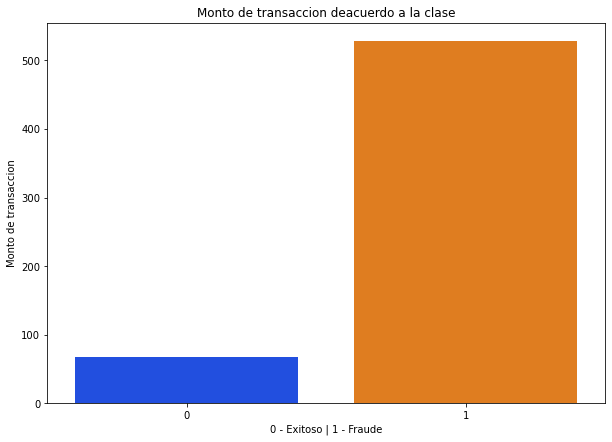

In [30]:
plt.figure(figsize=(10,7))
sb.barplot(x = 'Fraude', y = 'Monto transaccion', data = data, ci = None, palette="bright")
plt.title("Monto de transaccion deacuerdo a la clase")
plt.ylabel("Monto de transaccion")
plt.xlabel("0 - Exitoso | 1 - Fraude")
plt.show()

In [32]:
NoFraude = data.loc[data['Fraude'] == 0]
SiFraude =  data.loc[data['Fraude'] == 1]
NoFraudeMonto = NoFraude['Monto transaccion']
SiFraudeMonto = SiFraude['Monto transaccion']

In [33]:
stat, p = ttest_ind(SiFraudeMonto, NoFraudeMonto , equal_var = False)
print('t=%.3f, p=%.6f' % (stat, p))

t=54.316, p=0.000000


In [34]:
prueba(p)

'Si existen diferencias significativas'

### Dado el resultado podemos decir que la hipótesis alternativa es aceptada por lo tanto si existen diferencias significativas

In [49]:
stat, p = ttest_ind(new_Data['Genero'], new_Data['Monto transaccion'] , equal_var = False)
print('t=%.3f, p=%.6f' % (stat, p))

t=-111.535, p=0.000000
